In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [18]:
df_japan = pd.read_csv('data/japan.list', sep=' ', names=['distance', 'depth'])
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distance  420 non-null    float64
 1   depth     420 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


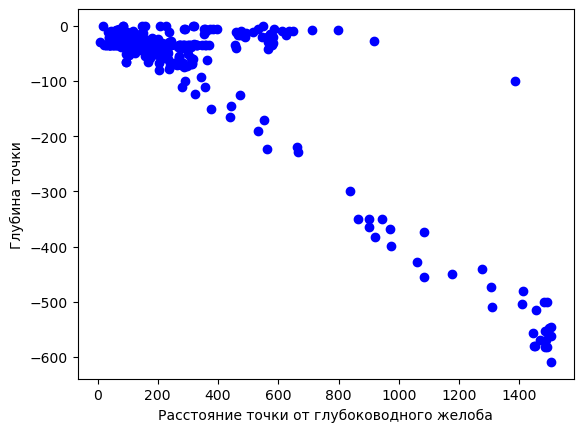

In [19]:
plt.scatter(df_japan.distance, df_japan.depth, color='blue')
plt.xlabel('Расстояние точки от глубоководного желоба')
plt.ylabel('Глубина точки');

In [20]:
std_scaler = StandardScaler()
std_scaler.fit(df_japan)
std_scaled = std_scaler.transform(df_japan)
df_japan[['std_scaled_distance', 'std_scaled_depth']] = std_scaled
df_japan

,distance,depth,std_scaled_distance,std_scaled_depth
0,8.744228,-30.1,-0.868451,0.337792
1,18.090458,0.0,-0.839859,0.583253
2,20.066726,-35.0,-0.833814,0.297834
3,28.427862,-35.0,-0.808236,0.297834
4,28.427862,-35.0,-0.808236,0.297834
...,...,...,...,...
415,1491.997576,-581.3,3.668968,-4.157147
416,1497.876215,-547.2,3.686952,-3.879068
417,1503.633237,-562.0,3.704563,-3.999759
418,1504.039132,-608.8,3.705805,-4.381405


Коэффициенты: [-0.9463283]
Свободный член: -0.10556321196979168


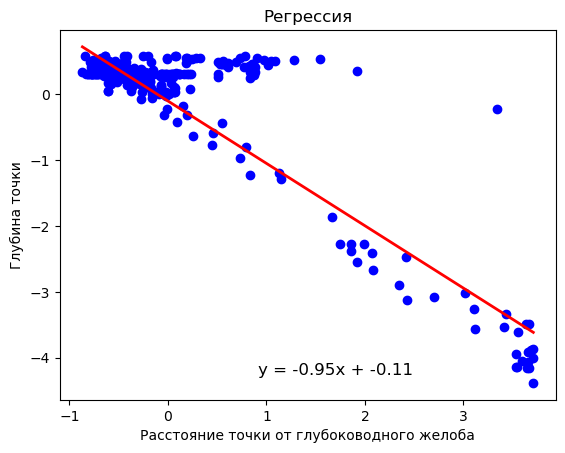

In [21]:
X = df_japan[['std_scaled_distance']]
y = df_japan['std_scaled_depth'].ravel()

degree = 1
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

huber = HuberRegressor()
huber.fit(X_poly, y)

pred = huber.predict(X_poly)

coefficients = huber.coef_
intercept = huber.intercept_

print("Коэффициенты:", coefficients)
print("Свободный член:", intercept)

formula_text = f'y = {coefficients[0]:.2f}x + {intercept:.2f}'

plt.scatter(X, y, color='blue')
plt.plot(X, pred, color='red', linewidth=2)
plt.text(0.40, 0.10, formula_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Расстояние точки от глубоководного желоба')
plt.ylabel('Глубина точки')
plt.title('Регрессия')
plt.show();

In [22]:
param_distributions = {
    'epsilon': uniform(1.0, 2.0),
    'max_iter': [100, 200, 300, 400, 500],
    'alpha': uniform(0.0001, 0.01)
}

random_search = RandomizedSearchCV(huber, param_distributions, n_iter=100, cv=5, random_state=42)

random_search.fit(X_poly, y)

print("Лучшие параметры:", random_search.best_params_)

Лучшие параметры: {'alpha': 0.002087156815341724, 'epsilon': 1.0110442342472048, 'max_iter': 300}


Коэффициенты: [-0.93284489]
Свободный член: -0.10433038581384149


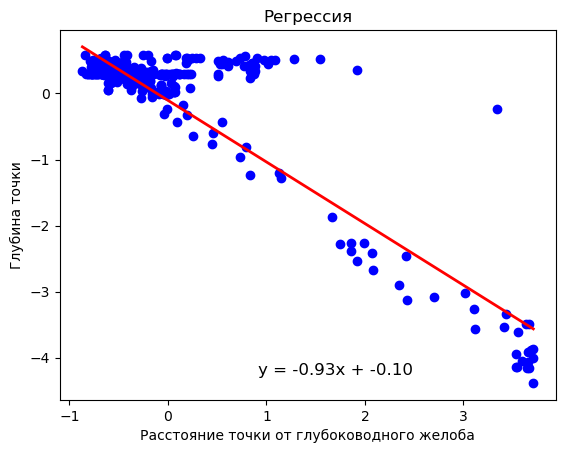

In [24]:
huber = HuberRegressor(alpha=0.002087156815341724, epsilon=1.0110442342472048, max_iter=300)
huber.fit(X_poly, y)

pred = huber.predict(X_poly)

coefficients = huber.coef_
intercept = huber.intercept_

print("Коэффициенты:", coefficients)
print("Свободный член:", intercept)

formula_text = f'y = {coefficients[0]:.2f}x + {intercept:.2f}'

plt.scatter(X, y, color='blue')
plt.plot(X, pred, color='red', linewidth=2)
plt.text(0.40, 0.10, formula_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Расстояние точки от глубоководного желоба')
plt.ylabel('Глубина точки')
plt.title('Регрессия')
plt.show();